In [1]:
import numpy as np
from scipy.stats import truncnorm, norm
from matplotlib import pyplot as plt
from minimax_tilting_sampler import *
from corner import corner

Set up a multivariate gaussian

In [2]:
cov = np.array([[1.5, -0.8], [-0.8, 2]])
mean = np.array([3, 4])

In [3]:
N = 10000
samples = np.random.multivariate_normal(mean, cov, N)

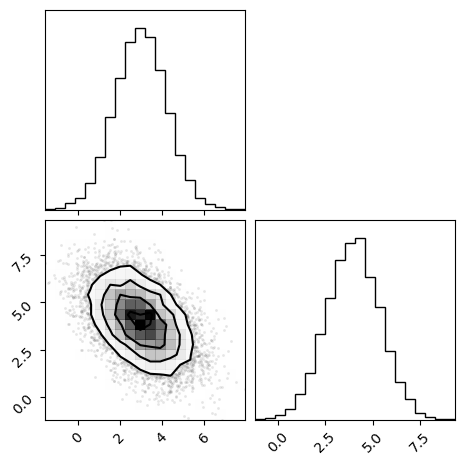

In [4]:
fig = corner(samples)

Cholesky decomposition

In [5]:
L = np.linalg.cholesky(cov)

In [6]:
samples_cholesky = np.dot(L, np.array([np.random.normal(size = N), np.random.normal(size = N)])).T

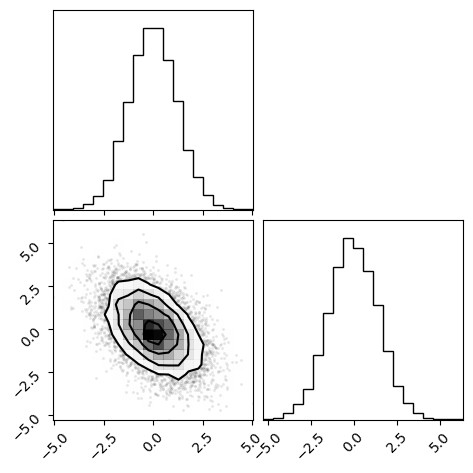

In [7]:
fig = corner(samples_cholesky)

If the domain is truncate, a simple mapping doesn't work.

In [8]:
xMin, xMax, yMin, yMax = mean[0]-2, mean[0] + 3, mean[1]-3, mean[1] + 2
bMin, bMax = np.array([xMin - mean[0], yMin - mean[1]]), np.array([xMax - mean[0], yMax-mean[1]])

In [9]:
uMin = np.linalg.solve(L, bMin)
uMax = np.linalg.solve(L, bMax)

In [10]:
samples_cholesky_trunc = np.dot(L, np.array([truncnorm(uMin[0], uMax[0]).rvs(size = N), truncnorm(uMin[1], uMax[1]).rvs(size = N)])).T
samples_cholesky_trunc.T[0] += mean[0]
samples_cholesky_trunc.T[1] += mean[1]

Only one dimension is correct, the other is not.

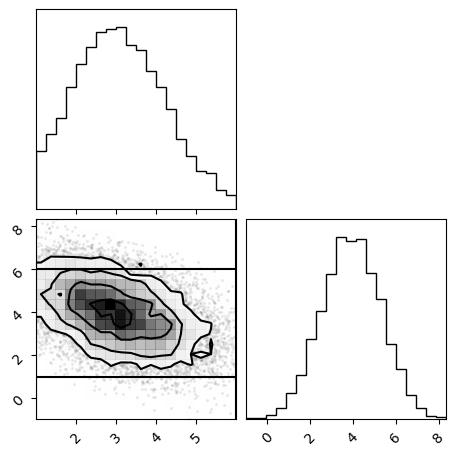

In [11]:
fig = corner(samples_cholesky_trunc)
fig.axes[2].axhline(yMin, c='k')
fig.axes[2].axhline(yMax, c='k')
fig.axes[2].axvline(xMin, c='k')
fig.axes[2].axvline(xMax, c='k')
plt.show(fig)

It turns out the algorithm is much more complicated in order to preserve the expectation values of the statistical moments (mean and variance), see https://arxiv.org/pdf/1603.04166.pdf

In [12]:
tmvn = TruncatedMVN(mean, cov, np.array([xMin, yMin]), np.array([xMax, yMax]))

In [13]:
samples_tmvn = tmvn.sample(N)

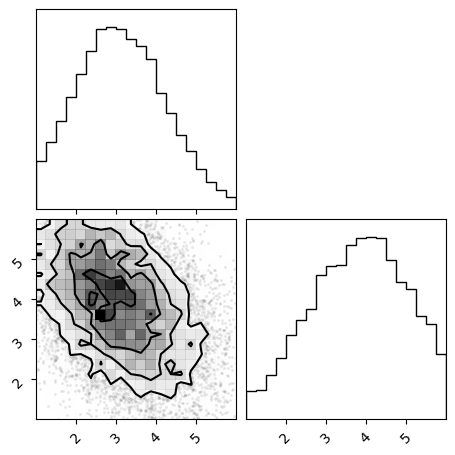

In [14]:
fig = corner(samples_tmvn.T)

Loading in a Fisher example from Ulyana

In [15]:
mean_vec = np.array([2.23117700e+00, 1.53594200e+00, 4.15380325e+02, -1.24634000e-01, 6.10743000e-01, 4.67570000e-02, 4.74377000e+00, 9.23836656e+08, 7.69892000e-01])
cov_mat = np.array([[ 4.93936592e-08, -3.17406128e-08,  4.15942644e-05, \
         1.71215767e-07, -1.68608001e-07,  2.10001311e-07, \
         4.24383243e-08, -1.88055274e-09,  8.27233359e-08], \
       [-3.17406128e-08,  2.03971310e-08, -2.52236506e-05, \
        -1.05256801e-07,  1.05794934e-07, -1.35671566e-07, \
        -2.89573695e-08,  1.14357845e-09, -5.65292229e-08], \
       [ 4.15942644e-05, -2.52236506e-05,  1.26779943e+02, \
         2.66914852e-01,  6.85000997e-02, -7.23102327e-01, \
        -8.80491297e-03, -4.50222800e-03, -1.74940396e-02], \
       [ 1.71215767e-07, -1.05256801e-07,  2.66914852e-01, \
         7.27954755e-04, -2.73489189e-06,  1.06124551e-06, \
        -5.35724321e-05, -1.13610370e-05, -1.06850410e-04], \
       [-1.68608001e-07,  1.05794934e-07,  6.85000997e-02, \
        -2.73489189e-06,  6.85367184e-04,  1.10753670e-06, \
         1.07500916e-04, -3.27501754e-06,  2.15075088e-04], \
       [ 2.10001311e-07, -1.35671566e-07, -7.23102327e-01, \
         1.06124551e-06,  1.10753670e-06,  3.72139646e-02, \
         2.30881516e-06, -1.72279299e-08,  4.60564314e-06], \
       [ 4.24383170e-08, -2.89573649e-08, -8.80491298e-03, \
        -5.35724321e-05,  1.07500916e-04,  2.30881513e-06, \
         2.69966003e-05,  3.35180482e-07,  5.39792275e-05], \
       [-1.88055274e-09,  1.14357845e-09, -4.50222800e-03, \
        -1.13610370e-05, -3.27501754e-06, -1.72279299e-08, \
         3.35180482e-07,  1.93516673e-07,  6.65404146e-07], \
       [ 8.27233505e-08, -5.65292323e-08, -1.74940396e-02, \
        -1.06850410e-04,  2.15075088e-04,  4.60564321e-06, \
         5.39792276e-05,  6.65404146e-07,  1.07930735e-04]])

Check the samples drawn from the full domain.

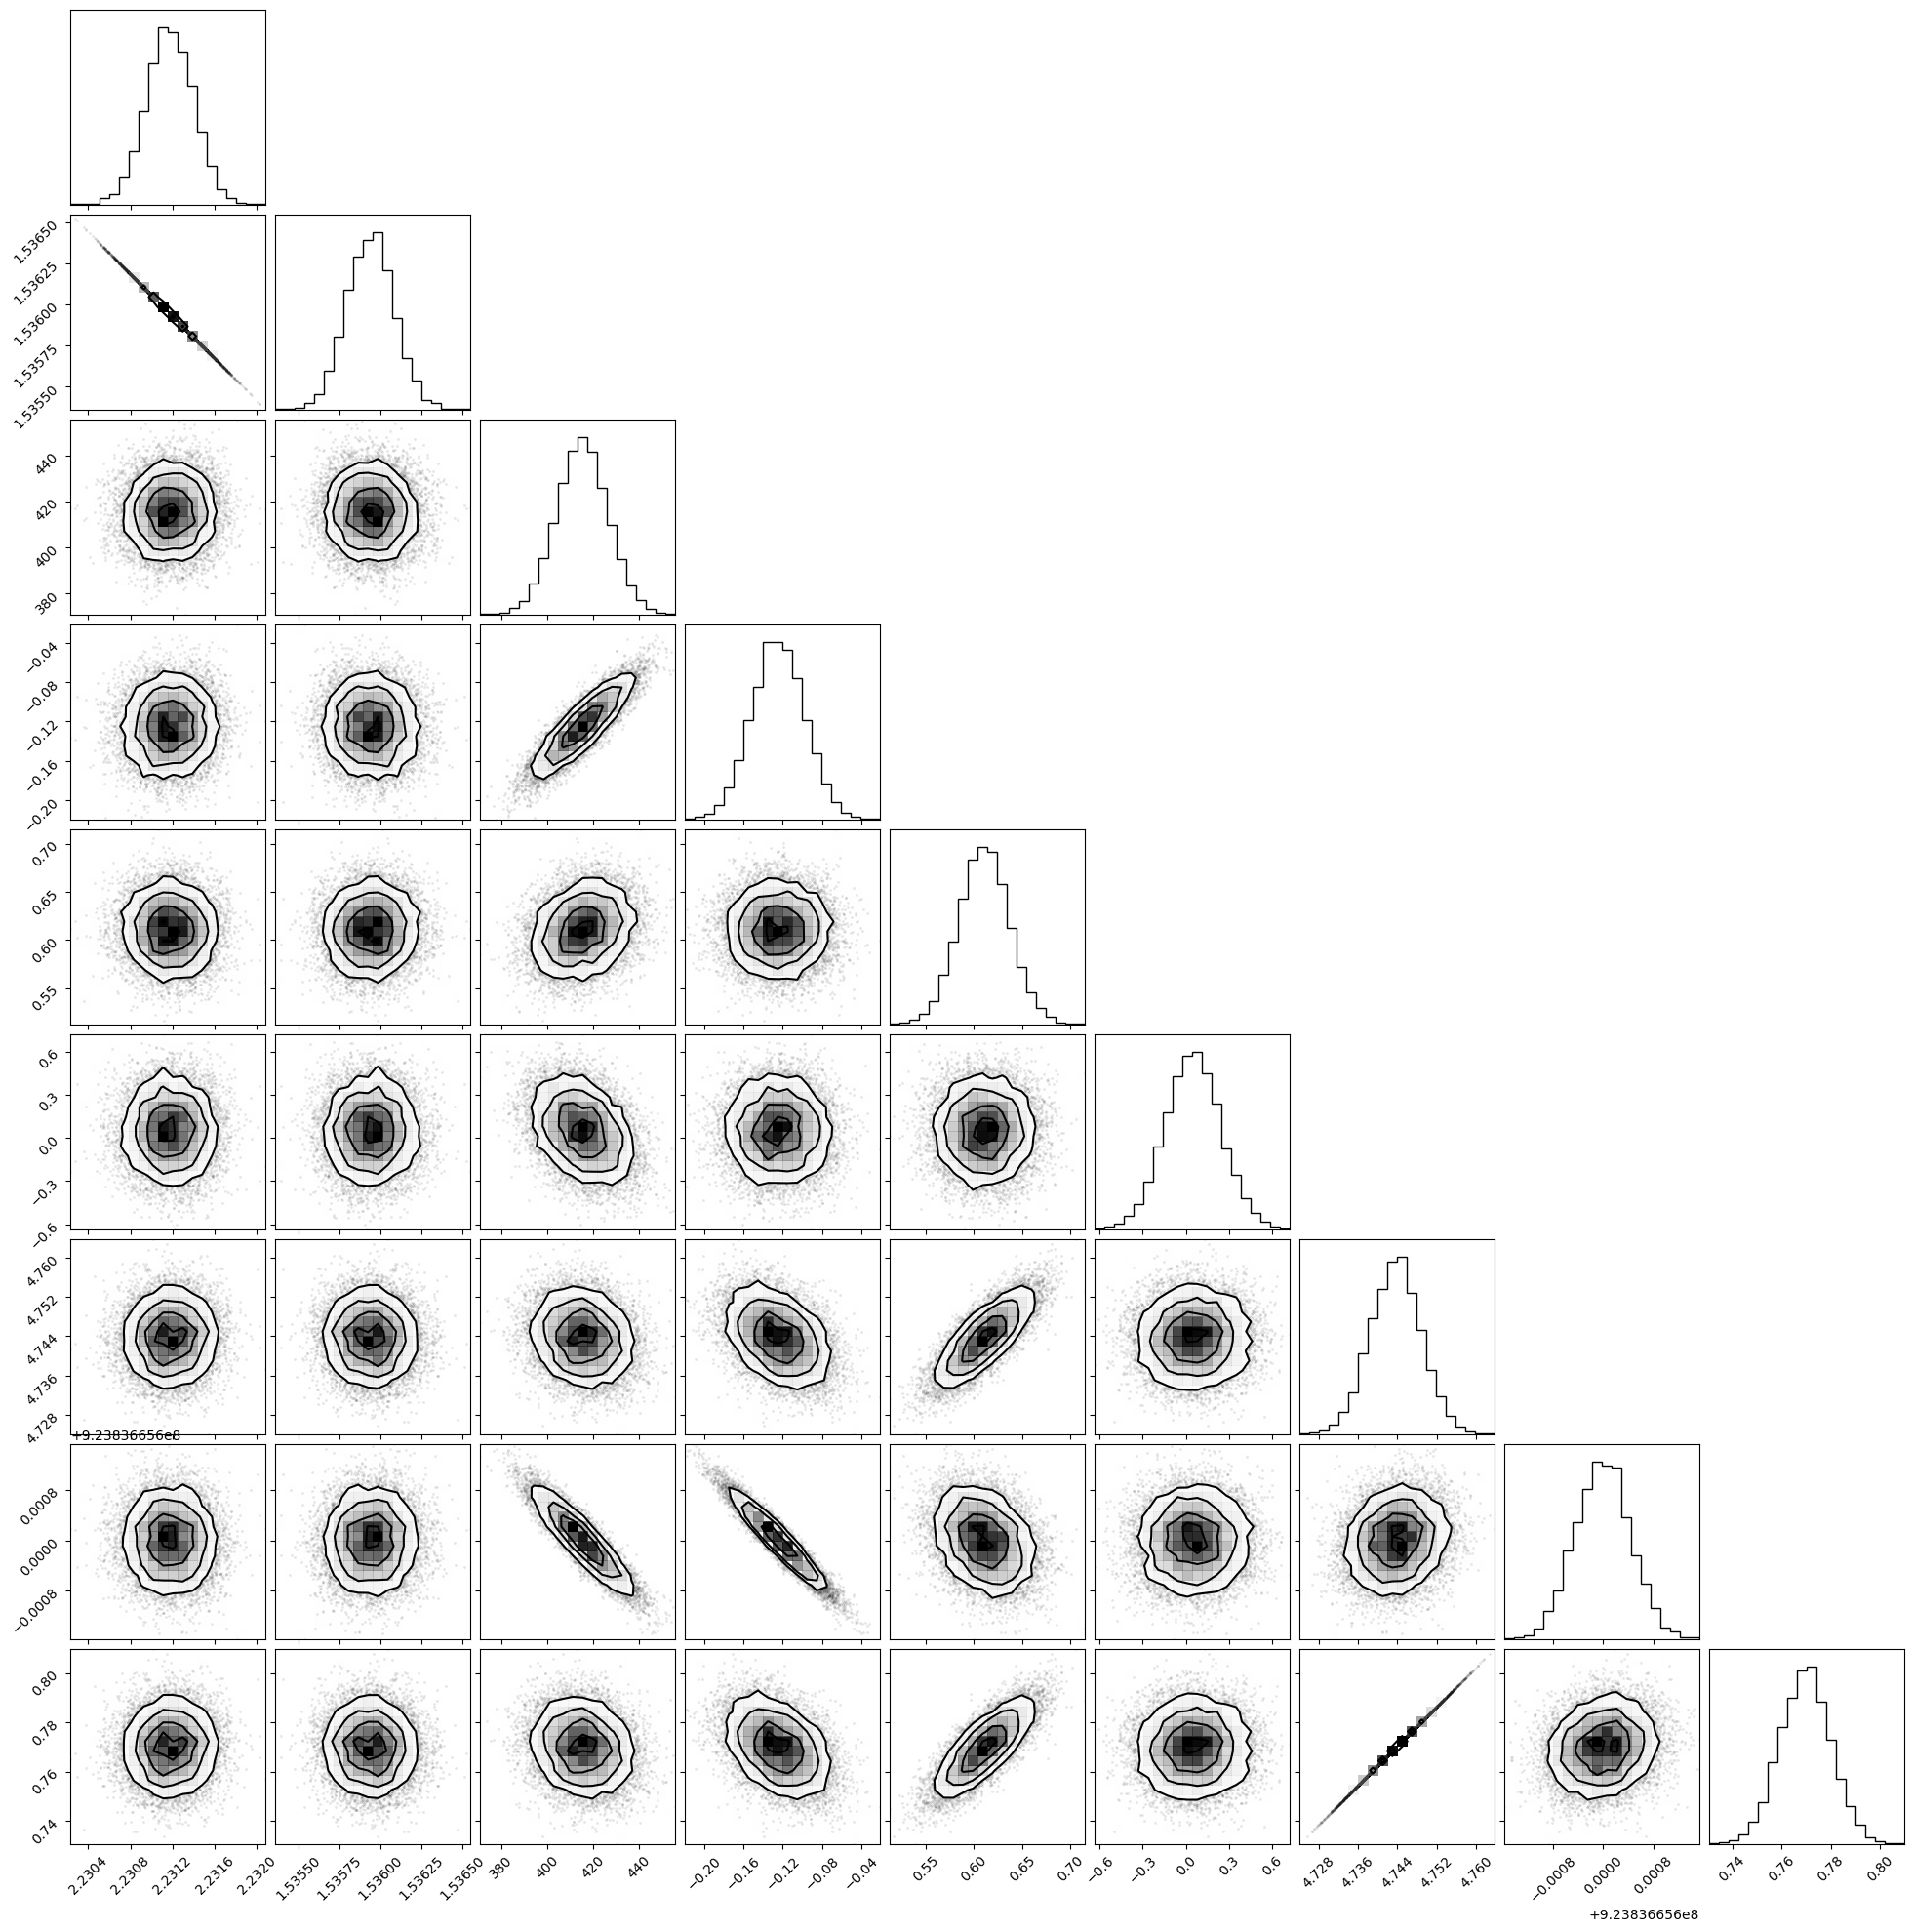

In [16]:
samples_full = np.random.multivariate_normal(mean_vec, cov_mat, size=10000)
fig_full = corner(samples_full)

In [20]:
oneSigma_vec = np.sqrt(np.diag(cov_mat))
min_vec, max_vec = np.array([-np.inf]*len(mean_vec)), mean_vec+oneSigma_vec#np.array([np.inf]*len(mean_vec))
#min_vec[0], min_vec[1] = 1.0, 1.0
#max_vec[0], max_vec[1] = 3.0, 3.0
tmvn = TruncatedMVN(mean_vec, cov_mat, min_vec, max_vec)
min_vec, max_vec, oneSigma_vec

(array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]),
 array([ 2.23139925e+00,  1.53608482e+00,  4.26639985e+02, -9.76533633e-02,
         6.36922518e-01,  2.39666213e-01,  4.74896583e+00,  9.23836656e+08,
         7.80280972e-01]),
 array([2.22246843e-04, 1.42818525e-04, 1.12596600e+01, 2.69806367e-02,
        2.61795184e-02, 1.92909213e-01, 5.19582528e-03, 4.39905300e-04,
        1.03889718e-02]))

In [21]:
Nsamp = 100000
samples = tmvn.sample(Nsamp).T

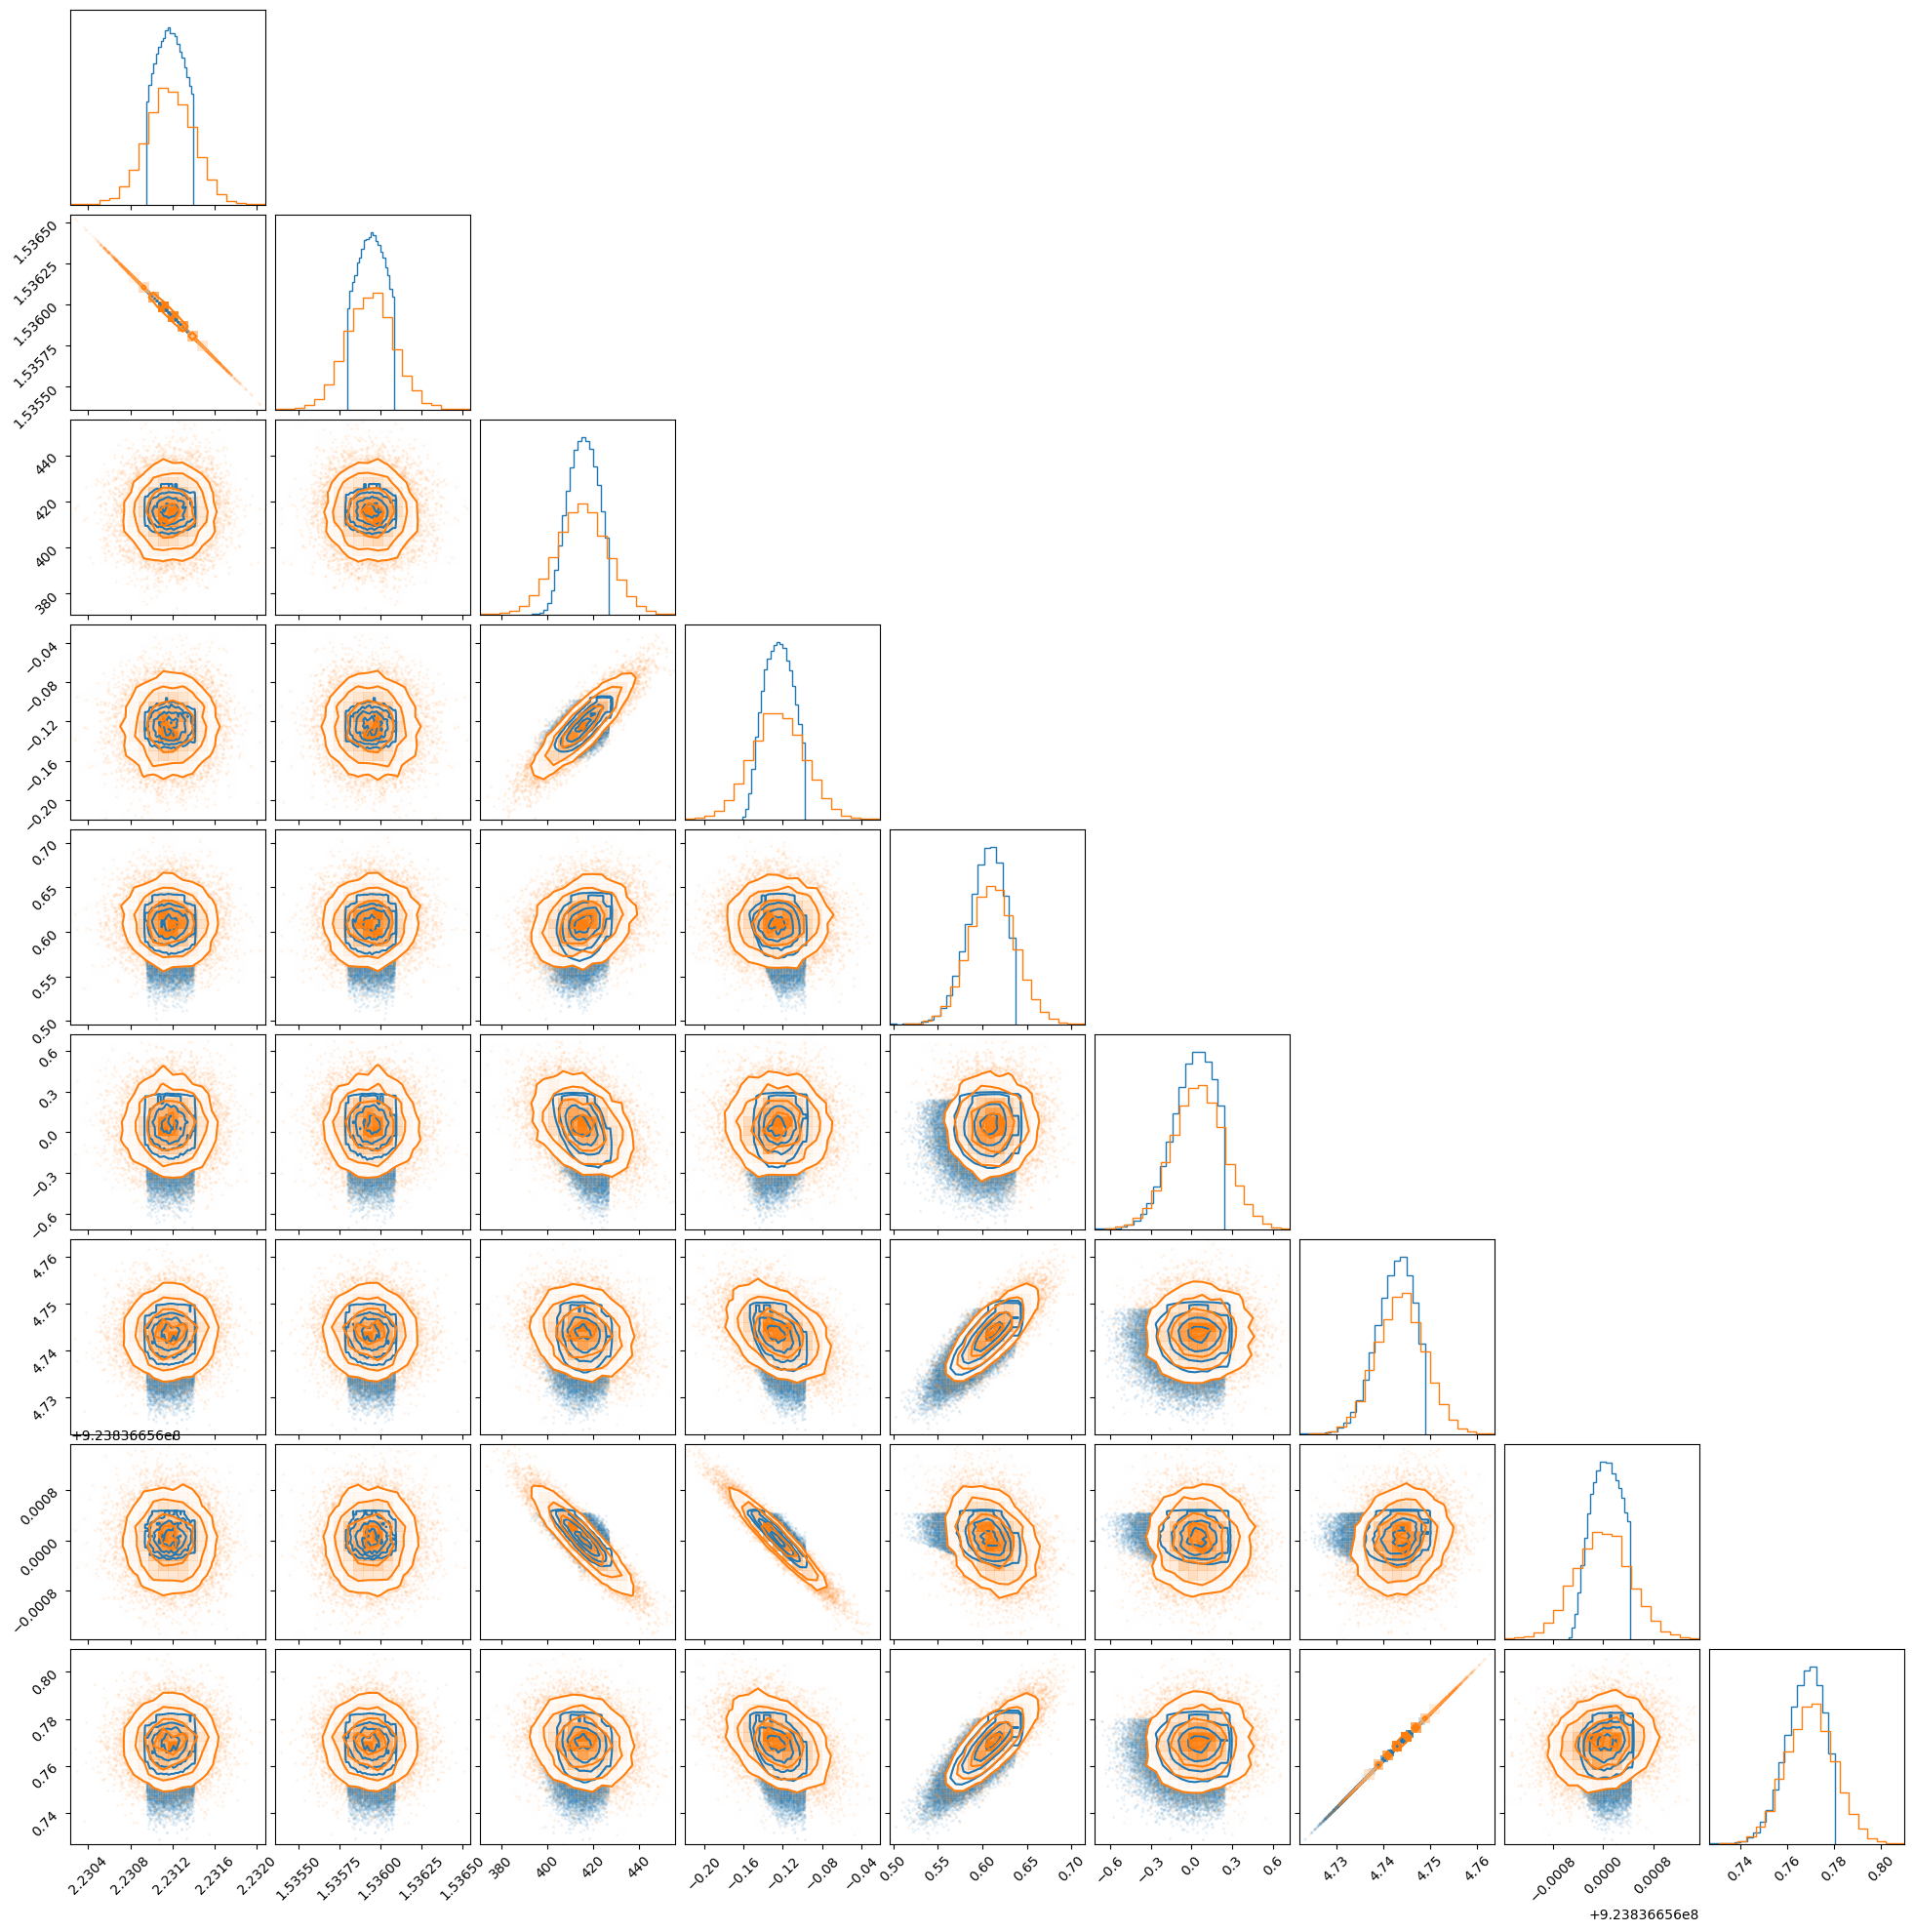

In [22]:
fig = corner(samples, color='C0', hist_kwargs={"density": True})
fig_compare = corner(samples_full, color='C1', fig=fig, hist_kwargs={"density": True})

TODO: try sampling sequetially from the rows of L matrix.